In [1]:
#Saving the model's output as a Numpy file
#CycleGAN_4.0 #Model trained on Semantickitti prediction on Semantickitti
#Prediction from the test folder saving predicted images# Working with entire folder

from transform_utils import lidar_transform,intensity_real_transform,incidence_transform, reflectance_transform
import os
import torch
from PIL import Image
from generator import Generator
from torchvision.utils import save_image
from torchvision.transforms.functional import to_tensor, to_pil_image
import numpy as np


def process_image(lidar_path, incidence_path, intensity_path, reflectance_path, output_folder, gt_output_folder, model, device):
    # Load the input images
    lidar = Image.open(lidar_path).convert("L")
    incidence = Image.open(incidence_path).convert("L")
    intensity = Image.open(intensity_path).convert("L")
    reflectance = Image.open(reflectance_path).convert("L")

    # Apply your transformations here...
    # Assuming lidar_transform, incidence_transform, intensity_real_transform, and reflectance_transform are defined elsewhere
    lidar = lidar_transform(lidar)
    incidence = incidence_transform(incidence)
    intensity = intensity_real_transform(intensity)
    reflectance = reflectance_transform(reflectance)

    def inverse_transform(tensor):
        mean = 0.4257
        std = 0.2276
        inv_tensor = tensor * std + mean
        return inv_tensor
    
    # Your model input construction here
    input_data = torch.cat((lidar, incidence, reflectance), dim=0)  # Example input
    input_data = input_data.unsqueeze(0) 
    input_data = input_data.to(device)
    
    with torch.no_grad():
        output = model(input_data)

    output = inverse_transform(output)

    # Save the output tensor as a NumPy array
    output_np = output.squeeze().cpu().numpy()  # Convert tensor to NumPy array

    # Determine output file path
    output_file = os.path.join(output_folder, os.path.splitext(os.path.basename(lidar_path))[0] + '.npy')
    
    # Save the output as a NumPy file
    np.save(output_file, output_np)

    # Process and save the intensity image as ground truth
    #intensity = inverse_transform(intensity)
    #intensity_np = intensity.squeeze().cpu().numpy()  # Convert intensity tensor to NumPy array

    # Determine ground truth output file path
    #gt_output_file = os.path.join(gt_output_folder, os.path.splitext(os.path.basename(intensity_path))[0] + 'GT' + '.npy')
    
    # Save the ground truth intensity as a NumPy file
    #np.save(gt_output_file, intensity_np)



# specify your input and output directories
Trial = "T1" #Change accordingly
in_channels = 3 #Change accordingly

#input_folder = "/DATA2/Vivek/Data/Trial_3/Train/" #Change accordingly
input_folder = '/DATA2/Vivek/Data/Downstream Task/Images for cycle intensity/Train'
output_folder = f"/DATA2/Vivek/Data/Downstream Task/Train/train_lidar_cycle_intensity" #Change accordingly
gt_output_folder = output_folder


# Check if the directory exists
if not os.path.exists(output_folder):
    # If it doesn't exist, create it
    os.makedirs(output_folder)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Generator(img_channels=in_channels, out_channels=1)  # Initialize your model architecture
checkpoint = torch.load(f'/DATA2/Vivek/Code/Implementation/Objective 3/CycleGAN/Output_4.0/gen_r.pth.tar_{Trial}')

model.load_state_dict(checkpoint['state_dict'])
model.to(device)
model.eval()

#Iterate over the subdirectories inside the input folder
subfolders = [f for f in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, f))]
folder = 'train'
reference_subfolder = f"{folder}_lidar_depth"
reference_files = os.listdir(os.path.join(input_folder, reference_subfolder))

for filename in reference_files:
    if filename.endswith(".jpg"):
        lidar_path = os.path.join(input_folder, f"{folder}_lidar_depth", filename)
        incidence_path = os.path.join(input_folder, f"{folder}_incidence_mask", filename)
        #intensity_path = os.path.join(input_folder, f"{folder}_lidar_intensity", filename)
        intensity_path = os.path.join(input_folder, f"{folder}_lidar_depth", filename)
        reflectance_path = os.path.join(input_folder, f"{folder}_lidar_reflectance", filename)

        
        process_image(lidar_path, incidence_path, intensity_path, reflectance_path, output_folder, gt_output_folder, model, device)






In [2]:
import numpy as np

# Path to the numpy file
numpy_file_path = '/DATA2/Vivek/Code/Implementation/Objective 3/CycleGAN/Plots/Pred_Image/Output_2.0/Voxel__cyclegan_1.0_T7/00_000255Pred.npy'

# Load the numpy array from file
loaded_array = np.load(numpy_file_path)

# Check the shape of the loaded array
array_shape = loaded_array.shape

# Check the size (total number of elements) of the loaded array
array_size = loaded_array.size

print(f"Shape of the loaded array: {array_shape}")
print(f"Size of the loaded array: {array_size}")


Shape of the loaded array: (64, 1024)
Size of the loaded array: 65536


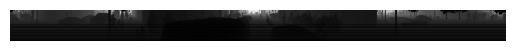

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_numpy_array(numpy_array):
    # Display the numpy array as an image using matplotlib
    plt.imshow(numpy_array, cmap='gray')  # Assuming the array is grayscale
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Path to the numpy file
numpy_file_path = '/DATA2/Vivek/Vivekk/Data/VoxelScape/Voxel_Downstream_Task/Train/train_lidar_depth/00_000045.npy'

# Load the numpy array from file
loaded_array = np.load(numpy_file_path)

# Visualize the loaded array
visualize_numpy_array(loaded_array)
